In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv")
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,NaN,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,NaN,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


In [3]:
test = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv")
test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left
0,0,Vistara,UK-816,Bangalore,Morning,zero,Afternoon,Delhi,Economy,2.67,18.0
1,1,Air_India,AI-440,Chennai,Early_Morning,zero,Morning,Delhi,Economy,NaN,5.0
2,2,SpiceJet,SG-8938,Delhi,Evening,one,Evening,Bangalore,Economy,NaN,44.0
3,3,Vistara,UK-838,Chennai,Night,one,Evening,Kolkata,Business,21.00,26.0
4,4,Air_India,AI-429,Delhi,Morning,one,Evening,Mumbai,Business,7.25,22.0


In [4]:
train.shape,test.shape

((40000, 12), (10000, 11))

## 1. Identified data types of columns

In [5]:
train.dtypes

id               int64
airline         object
flight          object
source          object
departure       object
stops           object
arrival         object
destination     object
class           object
duration       float64
days_left      float64
price            int64
dtype: object

id:               int64,
airline:         object,
flight:          object,
source:          object,
departure:       object,
stops:           object,
arrival:         object,
destination:     object,
class:           object,
duration:       float64,
days_left:      float64,
price:            int64

In [6]:
test.dtypes

id               int64
airline         object
flight          object
source          object
departure       object
stops           object
arrival         object
destination     object
class           object
duration       float64
days_left      float64
dtype: object

## 2. Descriptive statistics of numerical columns

In [7]:
train.describe()

,id,duration,days_left,price
count,40000.00000,36987.000000,35562.000000,40000.00000
mean,19999.50000,12.004088,26.197936,20801.49025
std,11547.14972,7.108063,13.469232,22729.14842
min,0.00000,0.830000,1.000000,1105.00000
25%,9999.75000,6.670000,15.000000,4687.00000
50%,19999.50000,11.080000,26.000000,7353.00000
75%,29999.25000,15.920000,38.000000,42521.00000
max,39999.00000,47.080000,49.000000,114704.00000


In [8]:
test.describe()

,id,duration,days_left
count,10000.00000,9418.000000,9304.000000
mean,4999.50000,12.005125,26.163156
std,2886.89568,7.086652,13.453717
min,0.00000,0.920000,1.000000
25%,2499.75000,6.670000,15.000000
50%,4999.50000,11.170000,26.000000
75%,7499.25000,15.920000,38.000000
max,9999.00000,40.420000,49.000000


## 3. Identify and handle missing values

In [9]:
train.isnull().sum()

id                0
airline        4613
flight            0
source            0
departure      4792
stops          2319
arrival           0
destination       0
class             0
duration       3013
days_left      4438
price             0
dtype: int64

Train null values
| Column         | Missing Values |
| -------------- | -------------- |
| **airline**    | 4,613          |
| **departure**  | 4,792          |
| **stops**      | 2,319          |
| **duration**   | 3,013          |
| **days\_left** | 4,438          |


In [10]:
test.isnull().sum()

id               0
airline        548
flight           0
source           0
departure      920
stops          651
arrival          0
destination      0
class            0
duration       582
days_left      696
dtype: int64

Test null values
| Column         | Missing Values |
| -------------- | -------------- |
| **airline**    | 548          |
| **departure**  | 920          |
| **stops**      | 651          |
| **duration**   | 582          |
| **days\_left** | 696          |


Duration distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


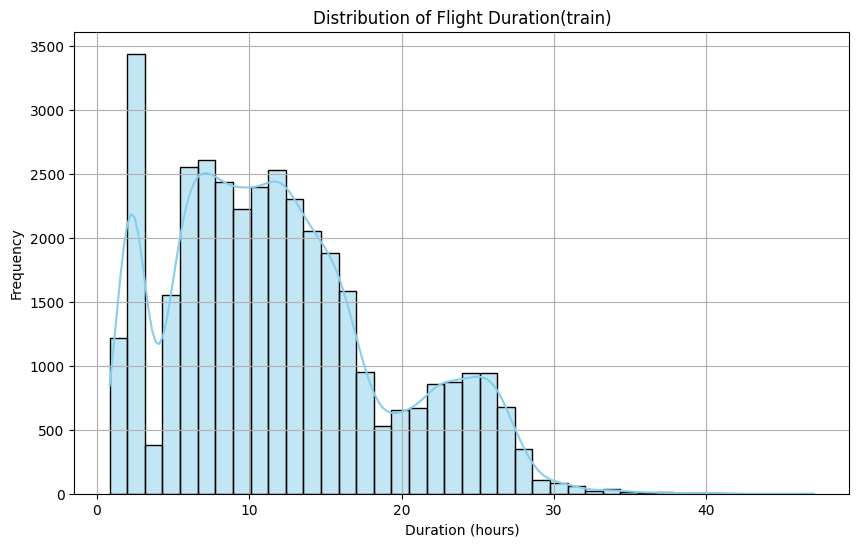

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train["duration"], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Flight Duration(train)")
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


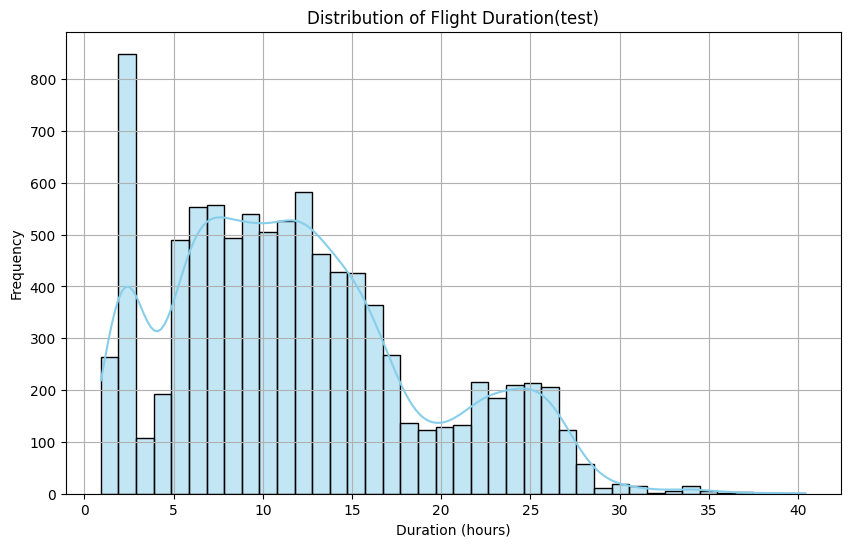

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(test["duration"], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Flight Duration(test)")
plt.xlabel("Duration (hours)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

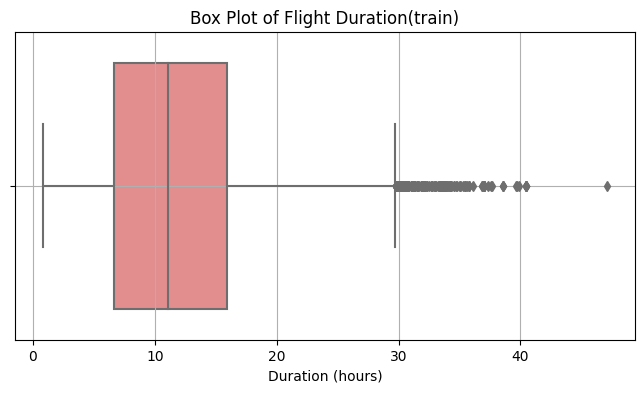

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=train["duration"], color='lightcoral')
plt.title("Box Plot of Flight Duration(train)")
plt.xlabel("Duration (hours)")
plt.grid(True)
plt.show()

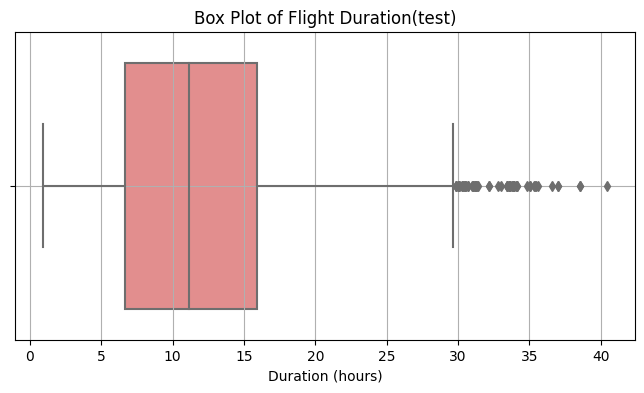

In [14]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=test["duration"], color='lightcoral')
plt.title("Box Plot of Flight Duration(test)")
plt.xlabel("Duration (hours)")
plt.grid(True)
plt.show()

- the duration column is right skewed (from hist). so the central tendency is more represented by the medain than mean.
- the duration has outliers(from boxplot) which affects mean. so median is the best strategy for imputing duration.

days_left distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


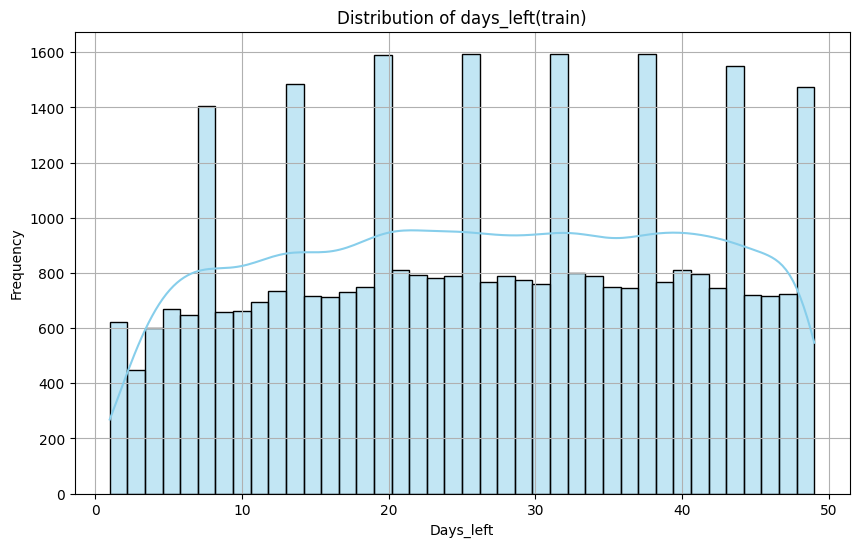

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train["days_left"], bins=40, kde=True, color='skyblue')
plt.title("Distribution of days_left(train)")
plt.xlabel("Days_left")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


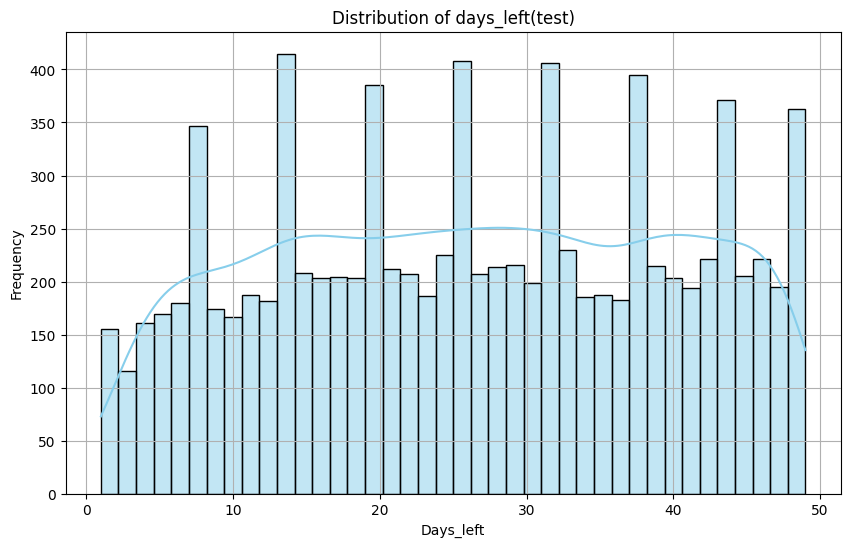

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(test["days_left"], bins=40, kde=True, color='skyblue')
plt.title("Distribution of days_left(test)")
plt.xlabel("Days_left")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

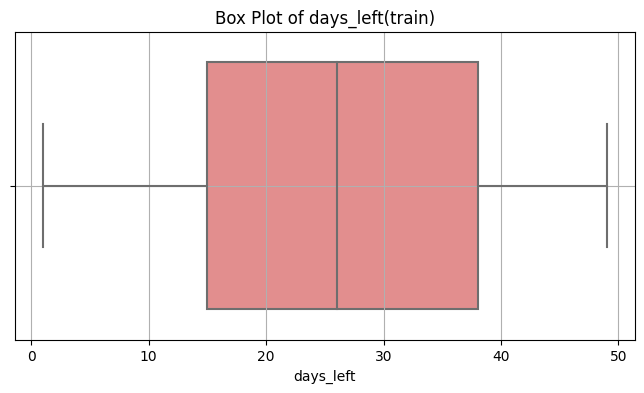

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=train["days_left"], color='lightcoral')
plt.title("Box Plot of days_left(train)")
plt.xlabel("days_left")
plt.grid(True)
plt.show()


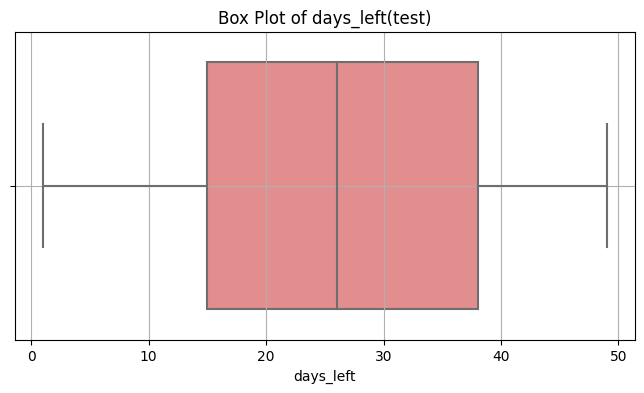

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=test["days_left"], color='lightcoral')
plt.title("Box Plot of days_left(test)")
plt.xlabel("days_left")
plt.grid(True)
plt.show()

- the histogram plot shows that the median represents the central tendency better without getting affected by some spikes in the data.
- the box plot shows that the column has no potential outliers.hence medain is the best possible strategy for imputing days_left column

Imputing missing values using SimpleImputer

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
X = train.drop(columns=["id","price"])
y = train['price']
test = test.drop(columns=["id"])

In [21]:
cat_col = ["airline", "departure", "stops", "flight", "source", "arrival", "destination", "class"]
num_col = ["duration", "days_left"]

In [22]:
transformer = ColumnTransformer([
    ('cat_imputer',SimpleImputer(strategy='most_frequent'),cat_col),
    ('num_imputer',SimpleImputer(strategy='median'),num_col)], remainder = 'passthrough'
)
transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['airline', 'departure', 'stops', 'flight',
                                  'source', 'arrival', 'destination',
                                  'class']),
                                ('num_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['duration', 'days_left'])])

In [23]:
X_imputed = transformer.transform(X)
test_imputed = transformer.transform(test)

In [24]:
X_imputed[0]

array(['Vistara', 'Early_Morning', 'one', 'UK-930', 'Mumbai', 'Night',
       'Chennai', 'Business', 11.08, 40.0], dtype=object)

In [25]:
test_imputed[0]

array(['Vistara', 'Morning', 'zero', 'UK-816', 'Bangalore', 'Afternoon',
       'Delhi', 'Economy', 2.67, 18.0], dtype=object)

In [26]:
X_imputed = pd.DataFrame(X_imputed,columns=["airline", "departure", "stops", "flight", "source", "arrival", "destination", "class","duration", "days_left"])
X_imputed.head()

,airline,departure,stops,flight,source,arrival,destination,class,duration,days_left
0,Vistara,Early_Morning,one,UK-930,Mumbai,Night,Chennai,Business,11.08,40.0
1,Air_India,Evening,one,AI-539,Chennai,Morning,Mumbai,Economy,16.08,26.0
2,SpiceJet,Early_Morning,zero,SG-8107,Delhi,Morning,Chennai,Economy,2.92,25.0
3,Vistara,Early_Morning,zero,0.00E+00,Hyderabad,Morning,Bangalore,Economy,1.5,22.0
4,Air_India,Early_Morning,one,AI-569,Chennai,Morning,Bangalore,Economy,4.83,20.0


In [27]:
test_imputed = pd.DataFrame(test_imputed,columns=["airline", "departure", "stops", "flight", "source", "arrival", "destination", "class","duration", "days_left"])
test_imputed.head()

,airline,departure,stops,flight,source,arrival,destination,class,duration,days_left
0,Vistara,Morning,zero,UK-816,Bangalore,Afternoon,Delhi,Economy,2.67,18.0
1,Air_India,Early_Morning,zero,AI-440,Chennai,Morning,Delhi,Economy,11.08,5.0
2,SpiceJet,Evening,one,SG-8938,Delhi,Evening,Bangalore,Economy,11.08,44.0
3,Vistara,Night,one,UK-838,Chennai,Evening,Kolkata,Business,21.0,26.0
4,Air_India,Morning,one,AI-429,Delhi,Evening,Mumbai,Business,7.25,22.0


In [28]:
X_imputed = pd.concat([X_imputed,y.rename('price')],axis=1)

In [29]:
X_imputed['duration'] = pd.to_numeric(X_imputed['duration'], errors='coerce')
X_imputed['days_left'] = pd.to_numeric(X_imputed['days_left'], errors='coerce')
test_imputed['duration'] = pd.to_numeric(test_imputed['duration'], errors='coerce')
test_imputed['days_left'] = pd.to_numeric(test_imputed['days_left'], errors='coerce')

In [30]:
X_imputed.dtypes

airline         object
departure       object
stops           object
flight          object
source          object
arrival         object
destination     object
class           object
duration       float64
days_left      float64
price            int64
dtype: object

In [31]:
test_imputed.dtypes

airline         object
departure       object
stops           object
flight          object
source          object
arrival         object
destination     object
class           object
duration       float64
days_left      float64
dtype: object

In [32]:
X_imputed.isnull().sum()

airline        0
departure      0
stops          0
flight         0
source         0
arrival        0
destination    0
class          0
duration       0
days_left      0
price          0
dtype: int64

In [33]:
test_imputed.isnull().sum()

airline        0
departure      0
stops          0
flight         0
source         0
arrival        0
destination    0
class          0
duration       0
days_left      0
dtype: int64

## 4. Identify and handle duplicates

In [34]:
X_imputed[X_imputed.duplicated(subset=X.columns)]

,airline,departure,stops,flight,source,arrival,destination,class,duration,days_left,price
1107,Indigo,Morning,zero,0.00E+00,Mumbai,Morning,Delhi,Economy,2.17,26.0,2339
1405,GO_FIRST,Evening,one,G8-2513,Delhi,Early_Morning,Kolkata,Economy,15.00,26.0,5954
1446,SpiceJet,Evening,zero,SG-8169,Delhi,Night,Mumbai,Economy,2.33,26.0,2621
1888,Air_India,Evening,one,AI-467,Delhi,Night,Hyderabad,Economy,27.08,26.0,5232
2210,Vistara,Evening,one,UK-854,Bangalore,Late_Night,Delhi,Economy,5.75,26.0,4111
...,...,...,...,...,...,...,...,...,...,...,...
39883,Vistara,Evening,one,UK-864,Bangalore,Late_Night,Delhi,Economy,5.17,26.0,4111
39908,Vistara,Evening,one,UK-894,Hyderabad,Morning,Mumbai,Economy,16.92,26.0,3776
39918,Vistara,Morning,one,UK-970,Mumbai,Evening,Bangalore,Business,10.08,26.0,95309
39962,Air_India,Early_Morning,one,AI-665,Delhi,Night,Kolkata,Business,15.67,26.0,53209


there are 857 duplicate rows.

In [35]:
X_imputed = X_imputed.drop_duplicates(subset=X.columns)
X_imputed[X_imputed.duplicated()]

,airline,departure,stops,flight,source,arrival,destination,class,duration,days_left,price


In [36]:
y = X_imputed['price']
X_imputed = X_imputed.drop(columns=['price'])
y

0        64173
1         4357
2         3251
3         1776
4         3584
         ...  
39994     7651
39995     6450
39996    64831
39998    84557
39999     5102
Name: price, Length: 39143, dtype: int64

In [37]:
X_imputed.columns,test_imputed.columns

(Index(['airline', 'departure', 'stops', 'flight', 'source', 'arrival',
        'destination', 'class', 'duration', 'days_left'],
       dtype='object'),
 Index(['airline', 'departure', 'stops', 'flight', 'source', 'arrival',
        'destination', 'class', 'duration', 'days_left'],
       dtype='object'))

## 5. Identify and handle outliers

duration outlier detection

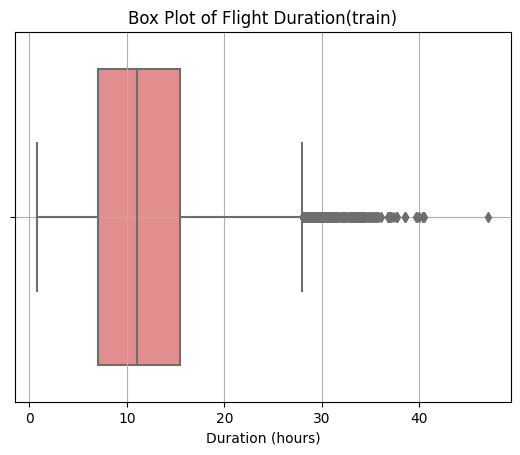

In [38]:
sns.boxplot(x=X_imputed["duration"], color='lightcoral')
plt.title("Box Plot of Flight Duration(train)")
plt.xlabel("Duration (hours)")
plt.grid(True)
plt.show()

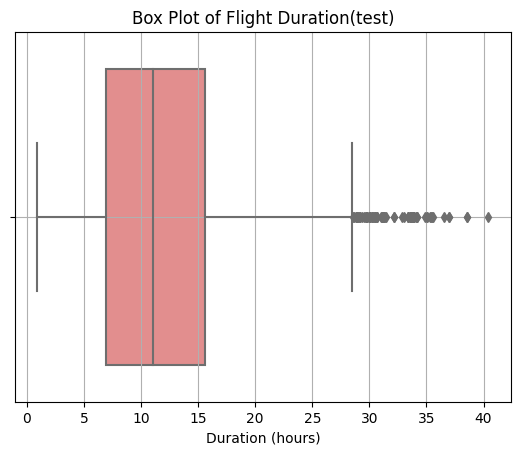

In [39]:
sns.boxplot(x=test_imputed["duration"], color='lightcoral')
plt.title("Box Plot of Flight Duration(test)")
plt.xlabel("Duration (hours)")
plt.grid(True)
plt.show()

- the duration column has outliers in it.
- target variable (price) is likely influenced by duration, but not always linearly.
- Flights with very long durations may be:
    - Multi-stop flights
    - Data issues
    - Irregular flight patterns (e.g., layovers)

- As the dropping of rows with extreme duration may result in lose of potential information related to price, the outliers can be handled using a method called capping.
- this is done by replacing extreme values with reasonable thresholds.
- here i am going to replace it with upper bound.

In [40]:
import numpy as np

In [41]:
Q1 = X_imputed['duration'].quantile(0.25)
Q3 = X_imputed['duration'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + (1.5*IQR)

In [42]:
X_imputed['duration'] = np.where(X_imputed['duration']>upper_bound,upper_bound,X_imputed['duration'])

In [43]:
test_imputed['duration'] = np.where(test_imputed['duration']>upper_bound,upper_bound,test_imputed['duration'])

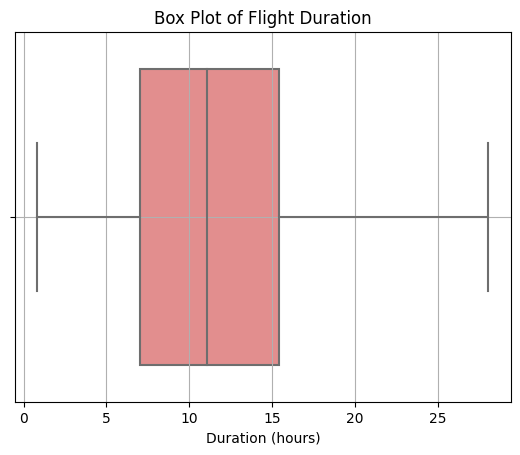

In [44]:
sns.boxplot(x=X_imputed["duration"], color='lightcoral')
plt.title("Box Plot of Flight Duration")
plt.xlabel("Duration (hours)")
plt.grid(True)
plt.show()

The outliers are handled using capping method

days_left outlier detection

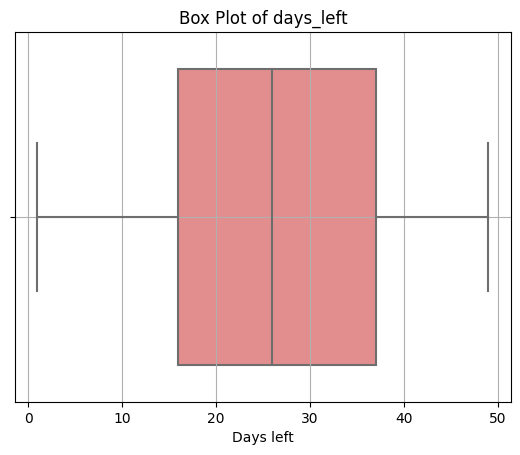

In [45]:
sns.boxplot(x=X_imputed["days_left"], color='lightcoral')
plt.title("Box Plot of days_left")
plt.xlabel("Days left")
plt.grid(True)
plt.show()

no outliers in days_left column

Target column(price) outlier detection

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


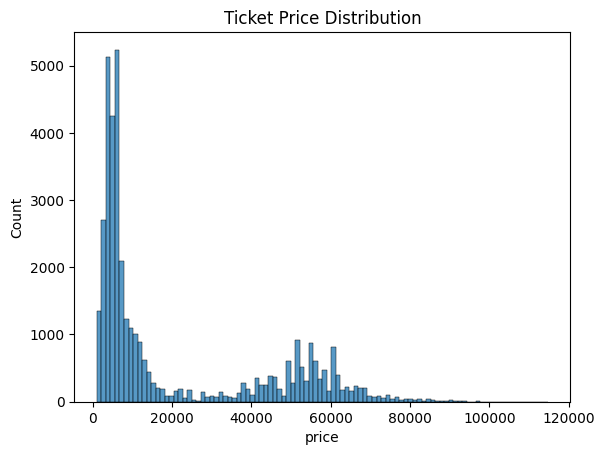

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y, bins=100)
plt.title("Ticket Price Distribution")
plt.show()


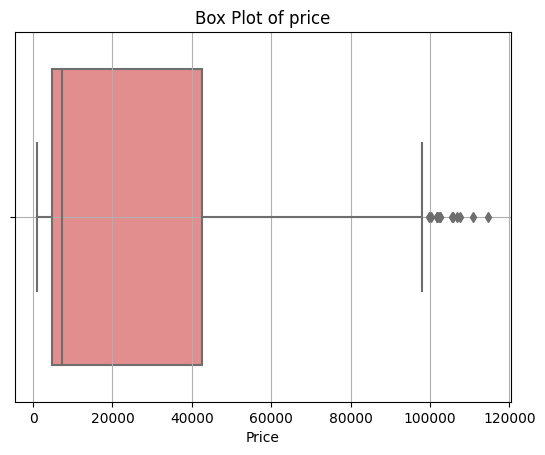

In [47]:
sns.boxplot(x=y, color='lightcoral')
plt.title("Box Plot of price")
plt.xlabel("Price")
plt.grid(True)
plt.show()

the target column 'price' has outliers. this can be handled by log transforming the target.

## 6. Scale numerical features and encode categorical features

- the duration column and the target column 'price' is right skewed. 
- log transformation should be done to 'duration' to reduce the skewness and make distribution symmetric before standardization.
- log transformation should be applied to price to reduce the influence of extreme values while training

In [48]:
X_imputed['duration'] = np.log1p(X_imputed['duration'])

In [49]:
test_imputed['duration'] = np.log1p(test_imputed['duration'])

In [50]:
y_log = np.log1p(y)

Scaling and encoding transformer

In [51]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder

In [52]:
num_features = ['duration', 'days_left']
cat_features = ['airline', 'source', 'departure', 'stops', 'arrival', 'destination', 'class']

In [53]:
preprocessor = ColumnTransformer(transformers=[
    ('airline_encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['airline']),
    ('depar_encoder',OrdinalEncoder(categories=[['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']]),['departure']),
    ('stops_encoder', OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']]), ['stops']),
    ('source_encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['source']),
    ('arr_encoder',OrdinalEncoder(categories=[['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night']]),['arrival']),
    ('dest_encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False),['destination']),
    ('class_encoder', OrdinalEncoder(categories=[['Economy', 'Business']]), ['class']),
    ('std_scaler',StandardScaler(),num_features),
],remainder='drop')

- Since flight column has the name of each flight, it has numerous categories. and it is also not related to the price prediction process. hence, it is removed during the scaling and encoding process.
- the 'airline', 'source', 'destination' columns are encoded using onehot encoder as they are nominal categories(no order).
- the 'departure', 'stops', 'arrival', 'class' columns are encoded using ordinal encoder as they are ordinal categories(has order).
- the 'duration' and 'days_left' are scaled with StandardScaler.

In [54]:
X_imputed

,airline,departure,stops,flight,source,arrival,destination,class,duration,days_left
0,Vistara,Early_Morning,one,UK-930,Mumbai,Night,Chennai,Business,2.491551,40.0
1,Air_India,Evening,one,AI-539,Chennai,Morning,Mumbai,Economy,2.837908,26.0
2,SpiceJet,Early_Morning,zero,SG-8107,Delhi,Morning,Chennai,Economy,1.366092,25.0
3,Vistara,Early_Morning,zero,0.00E+00,Hyderabad,Morning,Bangalore,Economy,0.916291,22.0
4,Air_India,Early_Morning,one,AI-569,Chennai,Morning,Bangalore,Economy,1.763017,20.0
...,...,...,...,...,...,...,...,...,...,...
39994,Indigo,Morning,one,0.00E+00,Chennai,Afternoon,Hyderabad,Economy,1.832581,3.0
39995,Vistara,Morning,one,UK-940,Mumbai,Evening,Bangalore,Economy,3.102342,43.0
39996,Vistara,Early_Morning,one,UK-720,Kolkata,Night,Mumbai,Business,2.713369,12.0
39998,Vistara,Morning,one,UK-940,Mumbai,Night,Bangalore,Business,3.245323,4.0


In [55]:
test_imputed

,airline,departure,stops,flight,source,arrival,destination,class,duration,days_left
0,Vistara,Morning,zero,UK-816,Bangalore,Afternoon,Delhi,Economy,1.300192,18.0
1,Air_India,Early_Morning,zero,AI-440,Chennai,Morning,Delhi,Economy,2.491551,5.0
2,SpiceJet,Evening,one,SG-8938,Delhi,Evening,Bangalore,Economy,2.491551,44.0
3,Vistara,Night,one,UK-838,Chennai,Evening,Kolkata,Business,3.091042,26.0
4,Air_India,Morning,one,AI-429,Delhi,Evening,Mumbai,Business,2.110213,22.0
...,...,...,...,...,...,...,...,...,...,...
9995,Air_India,Night,one,AI-839,Delhi,Early_Morning,Chennai,Economy,2.449279,23.0
9996,Air_India,Afternoon,one,AI-663,Mumbai,Night,Hyderabad,Economy,2.159869,26.0
9997,Vistara,Morning,one,UK-836,Chennai,Night,Hyderabad,Business,2.413232,24.0
9998,Air_India,Evening,one,AI-541,Hyderabad,Morning,Bangalore,Business,2.871868,49.0


In [56]:
preprocessor.fit(X_imputed)

ColumnTransformer(transformers=[('airline_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['airline']),
                                ('depar_encoder',
                                 OrdinalEncoder(categories=[['Early_Morning',
                                                             'Morning',
                                                             'Afternoon',
                                                             'Evening', 'Night',
                                                             'Late_Night']]),
                                 ['departure']),
                                ('stops_encoder',
                                 OrdinalEncoder(categories=[['zero', 'one',
                                                             'two_or_more']]),
                                 ['stops']),
                                ('source_...
                                ('arr_encoder',
                                 OrdinalEncoder(categories=[['Early_Morning',
                                                             'Morning',
                                                             'Afternoon',
                                                             'Evening', 'Night',
                                                             'Late_Night']]),
                                 ['arrival']),
                                ('dest_encoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['destination']),
                                ('class_encoder',
                                 OrdinalEncoder(categories=[['Economy',
                                                             'Business']]),
                                 ['class']),
                                ('std_scaler', StandardScaler(),
                                 ['duration', 'days_left'])])

In [57]:
X_train = preprocessor.transform(X_imputed)
X_test = preprocessor.transform(test_imputed)

In [58]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.15606142,  1.07727052],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.7242008 , -0.01385203],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.69006233, -0.09178935],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.51991617, -1.10497458],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         1.39249506, -1.72847318],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.546887  , -0.01385203]])

In [59]:
X_test

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.79815999, -0.63735063],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.15606142, -1.65053586],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.15606142,  1.38901982],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.02759156, -0.16972668],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.77990653,  1.77870645],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.81025831, -1.49466121]])

## 7. Model Building

####   1. Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

In [61]:
lr_model = LinearRegression()

In [62]:
scoring = {
    'neg_mse': 'neg_mean_squared_error',
    'r2': 'r2'
}

In [63]:
cv_results = cross_validate(lr_model, X_train, y_log, cv=5, scoring=scoring, return_train_score=True)
print("Linear Regression Evaluation:")
print("Average Train R²:", np.mean(cv_results['train_r2']))
print("Average Test R² :", np.mean(cv_results['test_r2']))
print("Average Test RMSE:", np.sqrt(-np.mean(cv_results['test_neg_mse'])))

Linear Regression Evaluation:
Average Train R²: 0.90880236142592
Average Test R² : 0.9086638415038804
Average Test RMSE: 0.33799344041967494


#### 2. Ridge Regression (L2 Regularized Linear Model)

In [64]:
from sklearn.linear_model import Ridge

In [65]:
ridge_model = Ridge(alpha=1.0, random_state=42)

In [66]:
cv_results = cross_validate(ridge_model, X_train, y_log, cv=5, scoring=scoring, return_train_score=True)

In [67]:
print("Ridge Regression Evaluation:")
print("Average Train R²:", np.mean(cv_results['train_r2']))
print("Average Test R² :", np.mean(cv_results['test_r2']))
print("Average Test RMSE:", np.sqrt(-np.mean(cv_results['test_neg_mse'])))

Ridge Regression Evaluation:
Average Train R²: 0.9088063524185361
Average Test R² : 0.9086645673786642
Average Test RMSE: 0.33799211572252214


#### 3. Lasso Regression (L1 Regularized Linear Model)

In [68]:
from sklearn.linear_model import Lasso

In [69]:
lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=10000)

In [70]:
cv_results = cross_validate(lasso_model, X_train, y_log, cv=5, scoring=scoring, return_train_score=True)

In [71]:
print("Lasso Regression Evaluation:")
print("Average Train R²:", np.mean(cv_results['train_r2']))
print("Average Test R² :", np.mean(cv_results['test_r2']))
print("Average Test RMSE:", np.sqrt(-np.mean(cv_results['test_neg_mse'])))

Lasso Regression Evaluation:
Average Train R²: 0.8356118602535052
Average Test R² : 0.8355556426768633
Average Test RMSE: 0.4535279119322469


#### 4. ElasticNet Regression (Combination of Lasso and Ridge)

In [72]:
from sklearn.linear_model import ElasticNet

In [73]:
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000)

In [74]:
cv_results = cross_validate(elastic_model, X_train, y_log, cv=5, scoring=scoring, return_train_score=True)

In [75]:
print("ElasticNet Regression Evaluation:")
print("Average Train R²:", np.mean(cv_results['train_r2']))
print("Average Test R² :", np.mean(cv_results['test_r2']))
print("Average Test RMSE:", np.sqrt(-np.mean(cv_results['test_neg_mse'])))

ElasticNet Regression Evaluation:
Average Train R²: 0.8271888302570108
Average Test R² : 0.8271110320033375
Average Test RMSE: 0.46502676921241637


#### 5. Decision Tree Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
tree_model = DecisionTreeRegressor(random_state=42,max_depth=10)

In [78]:
cv_results = cross_validate(tree_model, X_train, y_log, cv=5, scoring=scoring, return_train_score=True)

In [79]:
print("Decision Tree Regressor Evaluation:")
print("Average Train R²:", np.mean(cv_results['train_r2']))
print("Average Test R² :", np.mean(cv_results['test_r2']))
print("Average Test RMSE:", np.sqrt(-np.mean(cv_results['test_neg_mse'])))

Decision Tree Regressor Evaluation:
Average Train R²: 0.9493301482711392
Average Test R² : 0.9434214367100816
Average Test RMSE: 0.2660146162518508


#### 6. Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42, n_jobs=-1)

In [82]:
cv_results = cross_validate(rf_model, X_train, y_log, cv=5, scoring=scoring, return_train_score=True)

In [83]:
print("Random Forest Regressor Evaluation:")
print("Average Train R²:", np.mean(cv_results['train_r2']))
print("Average Test R² :", np.mean(cv_results['test_r2']))
print("Average Test RMSE:", np.sqrt(-np.mean(cv_results['test_neg_mse'])))

Random Forest Regressor Evaluation:
Average Train R²: 0.9939558609406859
Average Test R² : 0.9570810007163914
Average Test RMSE: 0.2316941893799317


#### 7. Gradient Boosting Regressor

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [86]:
cv_results = cross_validate(gb_model, X_train, y_log, cv=5, scoring=scoring, return_train_score=True)

In [87]:
print("Gradient Boosting Regressor Evaluation:")
print("Average Train R²:", np.mean(cv_results['train_r2']))
print("Average Test R² :", np.mean(cv_results['test_r2']))
print("Average Test RMSE:", np.sqrt(-np.mean(cv_results['test_neg_mse'])))

Gradient Boosting Regressor Evaluation:
Average Train R²: 0.943593265826874
Average Test R² : 0.9426909701938759
Average Test RMSE: 0.2677221327476289


| Model                     | Test R²    | Test RMSE  |
| ------------------------- | ---------- | ---------- |
| **Linear Regression**     | 0.9087     | 0.3380     |
| **Ridge Regression**      | 0.9087     | 0.3380     |
| **Lasso Regression**      | 0.8356     | 0.4535     |
| **ElasticNet Regression** | 0.8271     | 0.4650     |
| **Decision Tree**         | 0.9434     | 0.2660     |
| **Random Forest**         | **0.9571** | **0.2317** |
| **Gradient Boosting**     | 0.9427     | 0.2677     |


**Top 3 models**
* Random Forest Regressor: 
  Best performance overall (highest R² and lowest RMSE)
* Decision Tree Regressor: 
  Simple and still very strong; slightly behind ensemble models
* Gradient Boosting Regressor: 
  Competitive with decision tree and more stable generalization

## 8. Hyperparameter tuning on top 3 models

1. HPT on Random forest regressor

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
rf_param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None,10,20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

In [90]:
rf = RandomForestRegressor(random_state=42)

In [91]:
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [92]:
rf_grid.fit(X_train, y_log)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  20.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  18.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  35.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  17.0s


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [93]:
print("Best Parameters (Random Forest):", rf_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-rf_grid.best_score_))

Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV RMSE: 0.22929534458249812


2. HPT on Decision Tree Regressor

In [94]:
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [95]:
dt = DecisionTreeRegressor(random_state=42)

In [96]:
dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [97]:
dt_grid.fit(X_train, y_log)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [98]:
print("Best Parameters (Decision Tree):", dt_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-dt_grid.best_score_))

Best Parameters (Decision Tree): {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV RMSE: 0.2610463836113374


3. HPT on Gradient Boosting Regressor

In [99]:
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [100]:
gb = GradientBoostingRegressor(random_state=42)

In [101]:
gb_grid = GridSearchCV(
    estimator=gb,
    param_grid=gb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [102]:
gb_grid.fit(X_train, y_log)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  19.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  40.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  17.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  18.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  36.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  36.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  34.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  16.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  17.7s
[CV] END ma

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05], 'max_depth': [3, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [103]:
print("Best Parameters (Gradient Boosting):", gb_grid.best_params_)
print("Best CV RMSE:", np.sqrt(-gb_grid.best_score_))

Best Parameters (Gradient Boosting): {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV RMSE: 0.24076935660126936


## 9. Comparison of model performances on validation set

| Model                 | Best CV RMSE | Notes                                              |
| --------------------- | ------------ | -------------------------------------------------- |
| **Random Forest**     | **0.2293**   | Best overall — low error, stable                 |
| **Gradient Boosting** | 0.2408       | Strong, slightly slower, better with tuning        |
| **Decision Tree**     | 0.2610       | Simpler, interpretable, slightly worse performance |


Best model is:

Random Forest Regressor with
n_estimators=200, max_depth=None, min_samples_split=5, min_samples_leaf=1

This model gives the lowest RMSE and generalizes well.

## 10. Training on Random Forest regressor

In [104]:
rf_regressor = RandomForestRegressor(n_estimators=200,max_depth=None,min_samples_split=5,min_samples_leaf=1,random_state=42)

In [105]:
rf_regressor.fit(X_train,y_log)

RandomForestRegressor(min_samples_split=5, n_estimators=200, random_state=42)

In [106]:
y_pred_log = rf_regressor.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_pred

array([ 4499.43419035, 11500.22739849,  4839.65479049, ...,
       80098.85304027, 49178.54120318, 57260.78098793])

In [107]:
submission = pd.DataFrame({'price': y_pred})
submission.index.name = 'id'
submission.to_csv("submission.csv")

In [108]:
pd.read_csv("/kaggle/working/submission.csv").head()

,id,price
0,0,4499.434190
1,1,11500.227398
2,2,4839.654790
3,3,56826.840483
4,4,46327.656674


In [109]:
pd.read_csv("/kaggle/working/submission.csv").shape

(10000, 2)

In [110]:
import joblib

joblib.dump(rf_regressor, 'rf_model.pkl')

['rf_model.pkl']